In [285]:

import warnings
from math import sqrt
import matplotlib as mpl
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
import statsmodels.api as smapi
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [286]:
warnings.filterwarnings("ignore")


seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

In [287]:
dataset = pd.read_csv('/Users/aryanthakur/Downloads/transactions.csv', parse_dates=['date'])
dataset.set_index('date', inplace=True)
dataset.head()

,store_nbr,transactions
date,,
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922


In [288]:
dataset.describe()

,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


In [289]:
indexedDataset = dataset.resample('M').sum()

In [290]:
indexedDataset.head(100)

,store_nbr,transactions
date,,
2013-01-31,36325,2289558
2013-02-28,33880,2169615
2013-03-31,37510,2458683
2013-04-30,36300,2344905
2013-05-31,38338,2467465
2013-06-30,37238,2392206
2013-07-31,37936,2401968
2013-08-31,38626,2461139
2013-09-30,37380,2380462


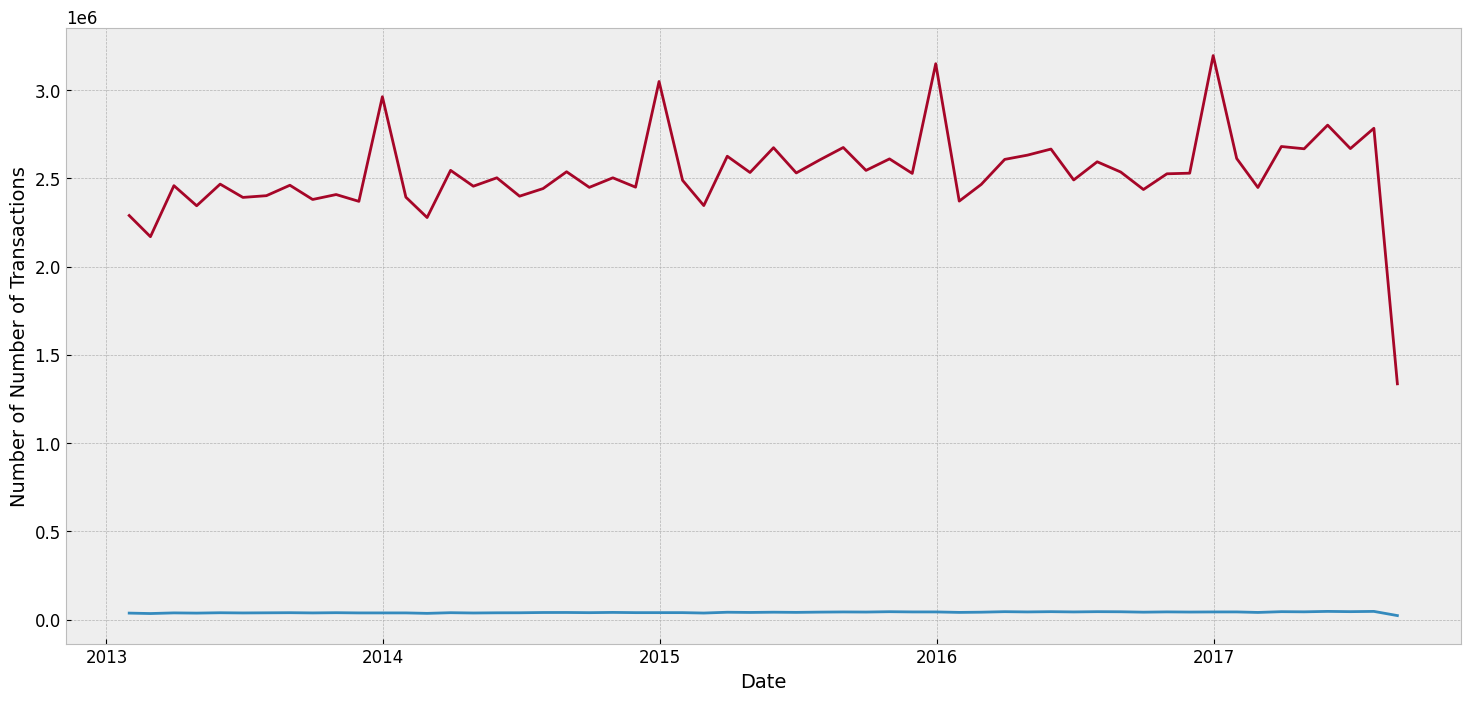

In [291]:
plt.xlabel("Date")
plt.ylabel ("Number of Number of Transactions")
plt.plot(indexedDataset)

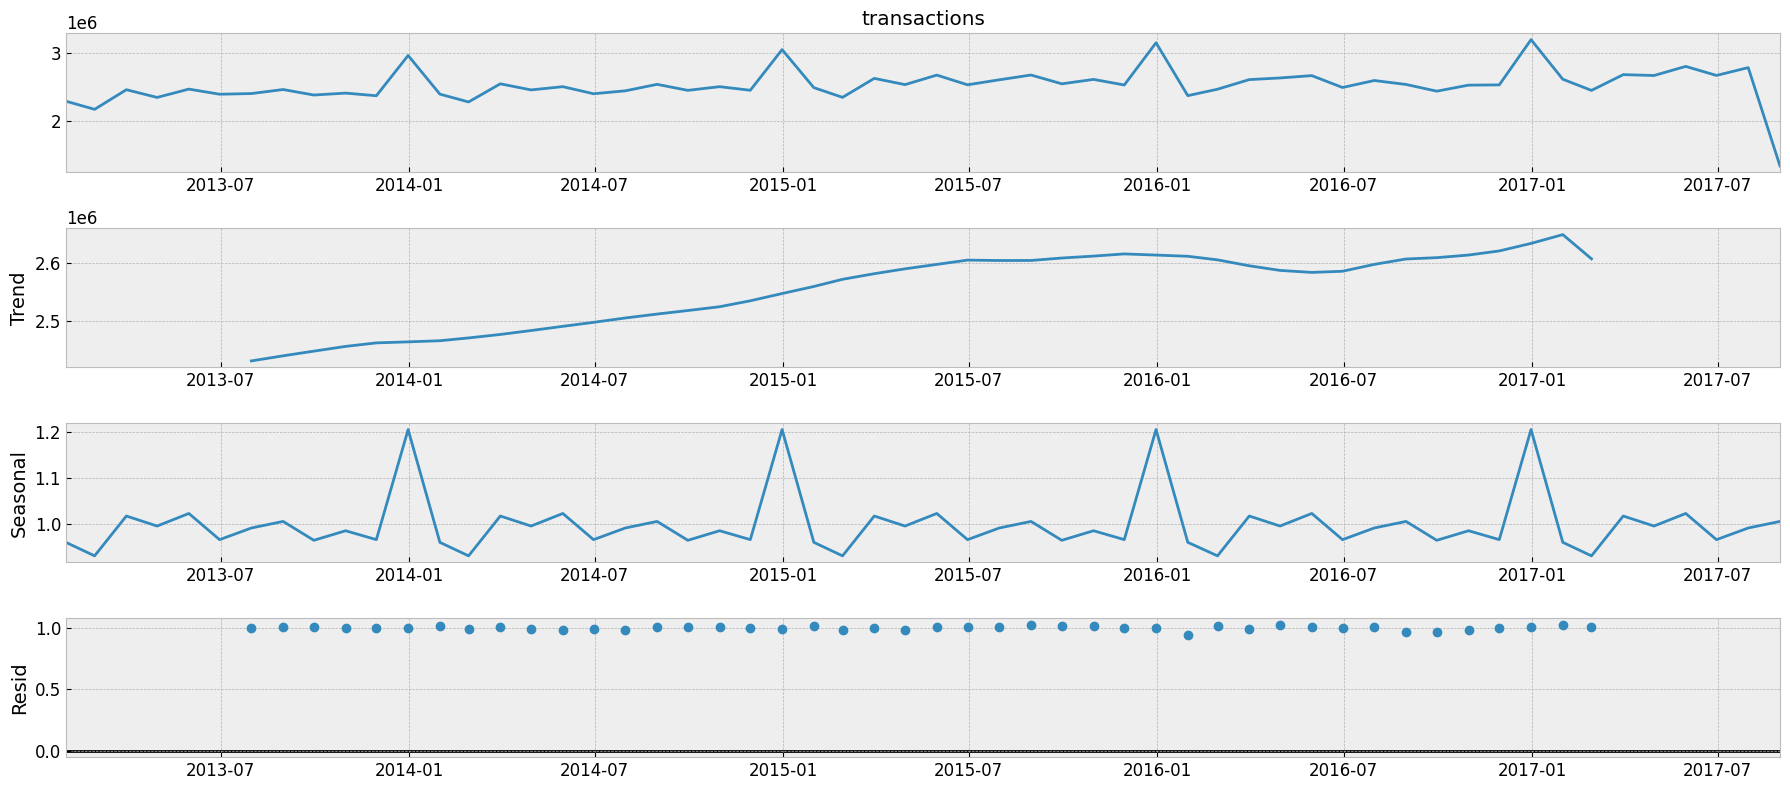

<Figure size 5000x2000 with 0 Axes>

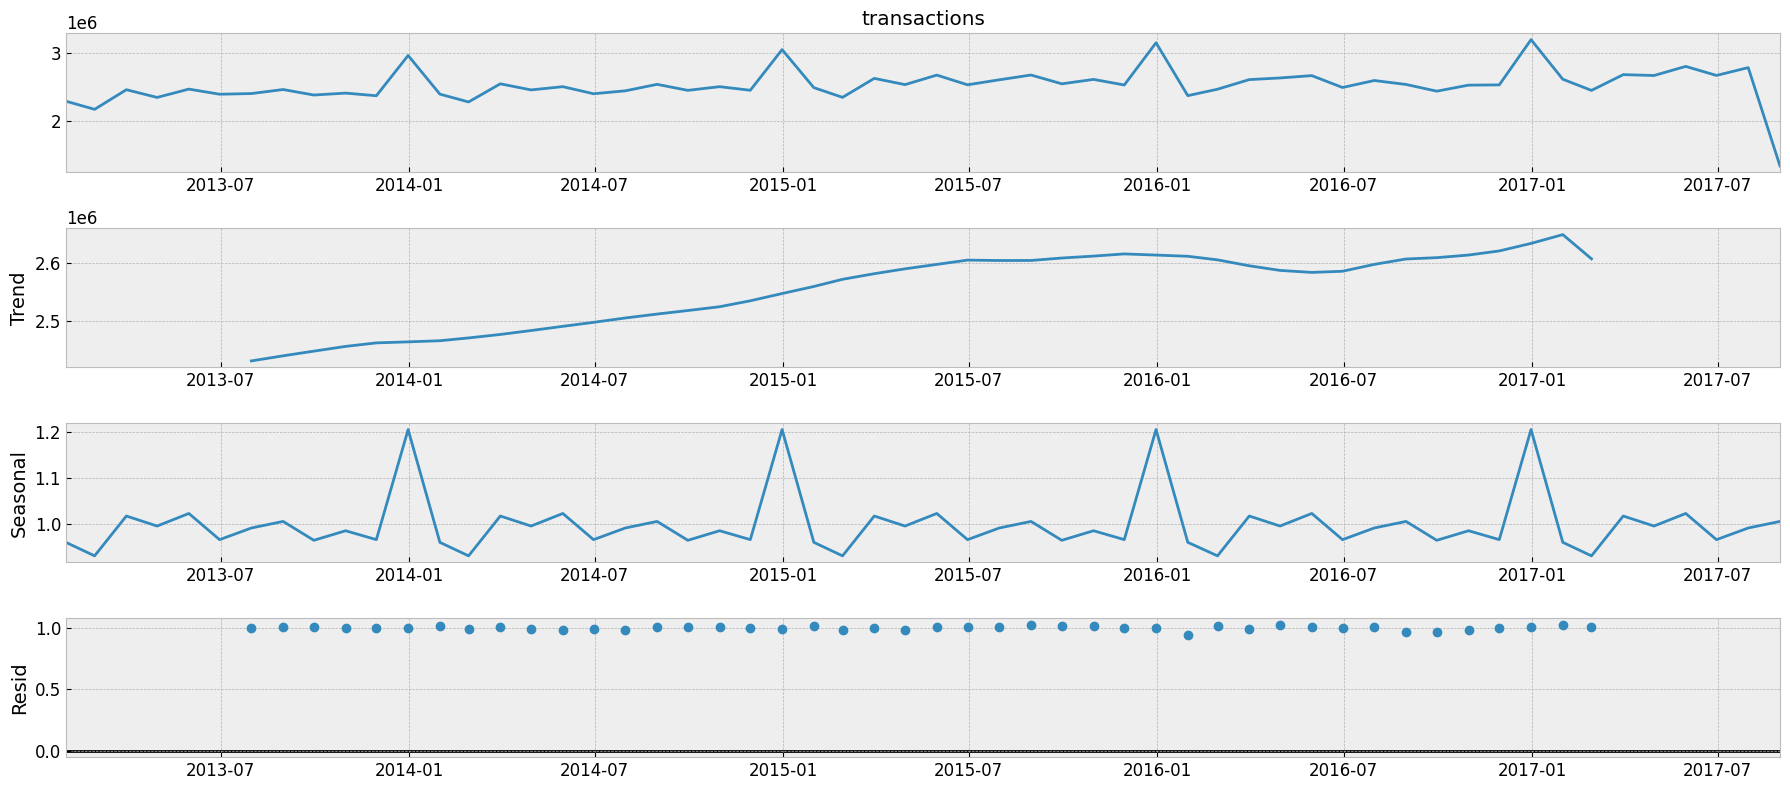

In [292]:
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20))
series = indexedDataset.transactions
result = seasonal_decompose(series, model='multiplicative')
result.plot()

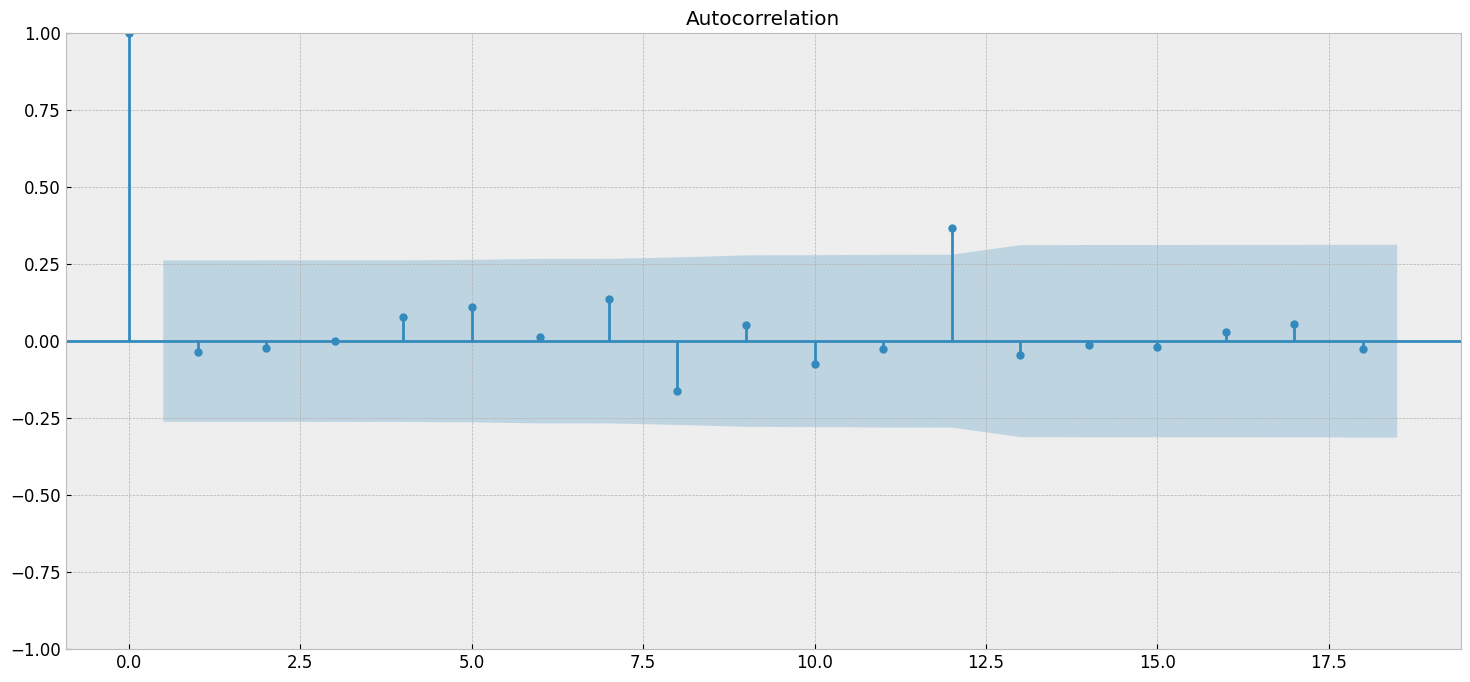

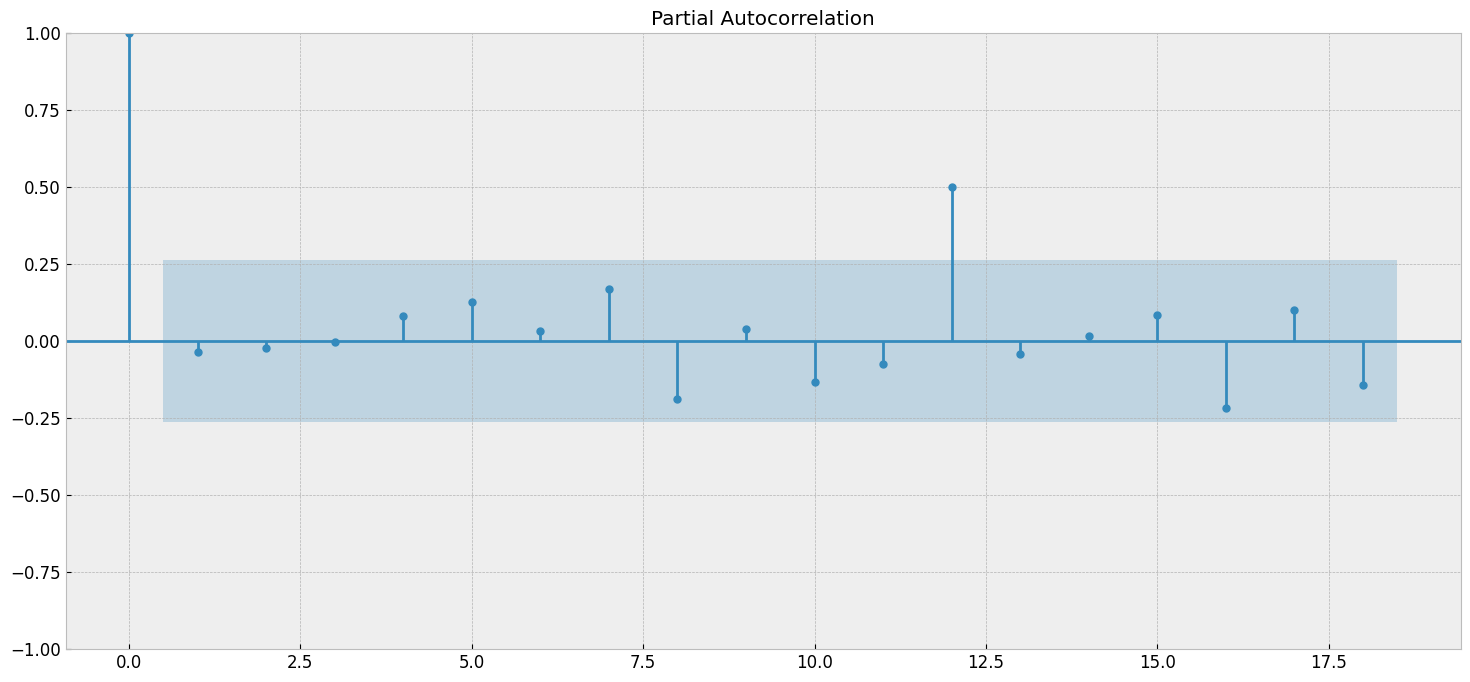

In [293]:
plot_acf(indexedDataset.transactions)
plot_pacf(indexedDataset.transactions)
plt.show()

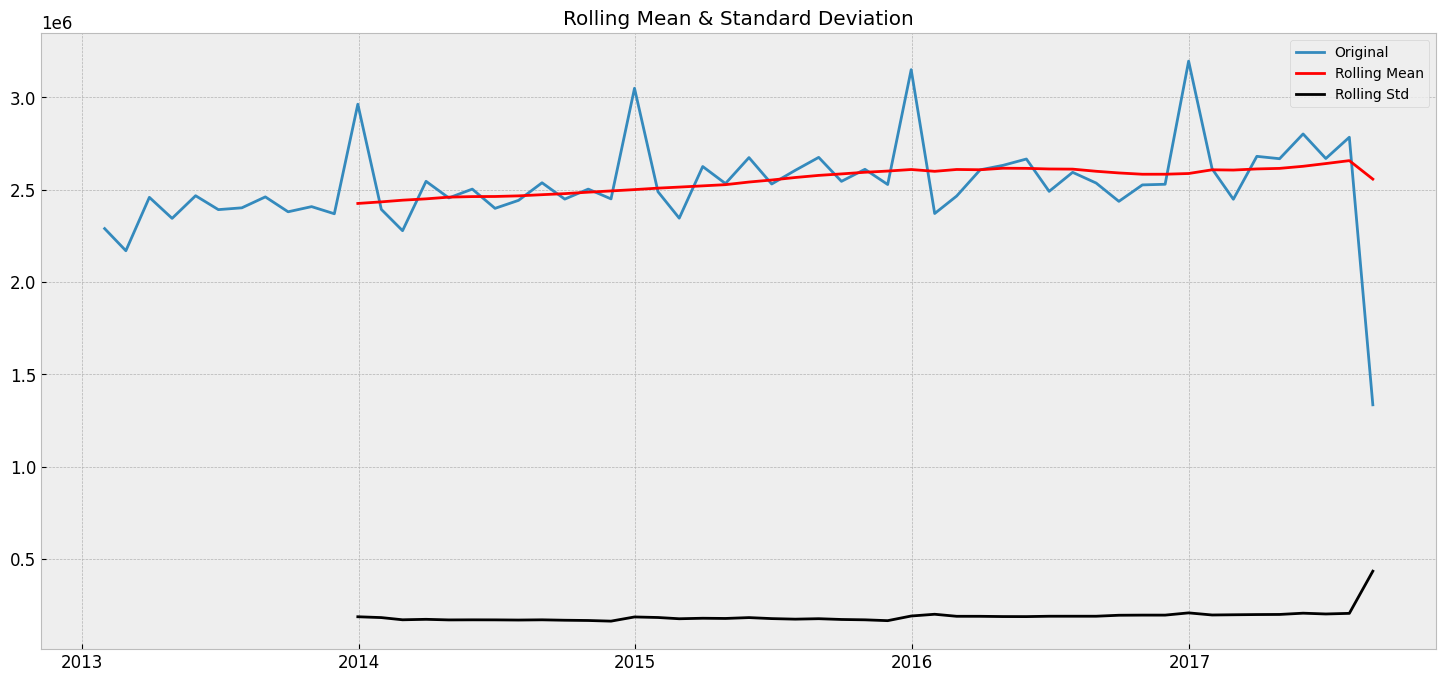

In [294]:
rolmean = indexedDataset.transactions.rolling(window=12).mean()
rolstd = indexedDataset.transactions.rolling(window=12).std()
orig = plt.plot(indexedDataset.transactions, label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False) 

In [295]:
X = indexedDataset.transactions.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.864719
p-value: 0.348836
Critical Values:
	1%: -3.589
	5%: -2.930
	10%: -2.603


In [296]:
def difference(dataset, interval=1, order=1):
    for u in range(order):
        diff = list()
        for i in range(interval, len(dataset)):
            value = dataset[i] - dataset[i - interval]
            diff.append(value)
        dataset = diff
    return diff

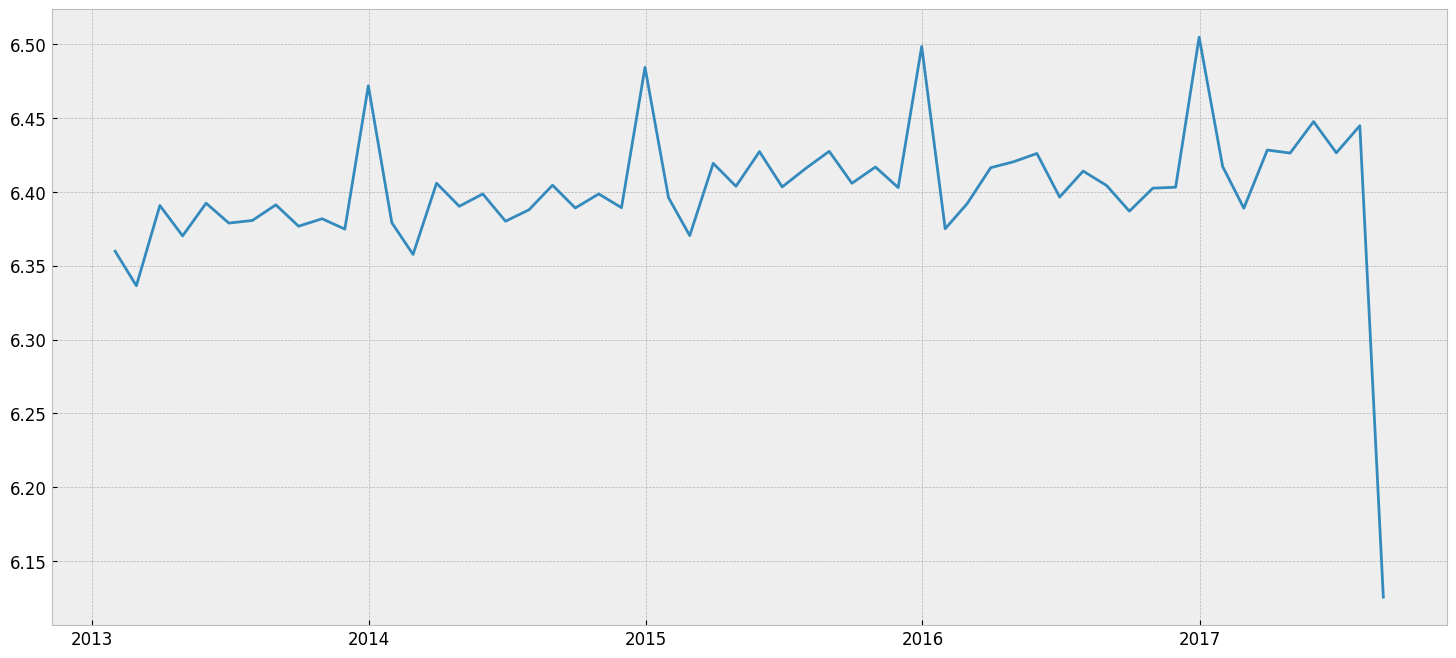

In [297]:
indexedDataset_logscale = np.log10(indexedDataset.transactions)
plt.plot(indexedDataset_logscale)

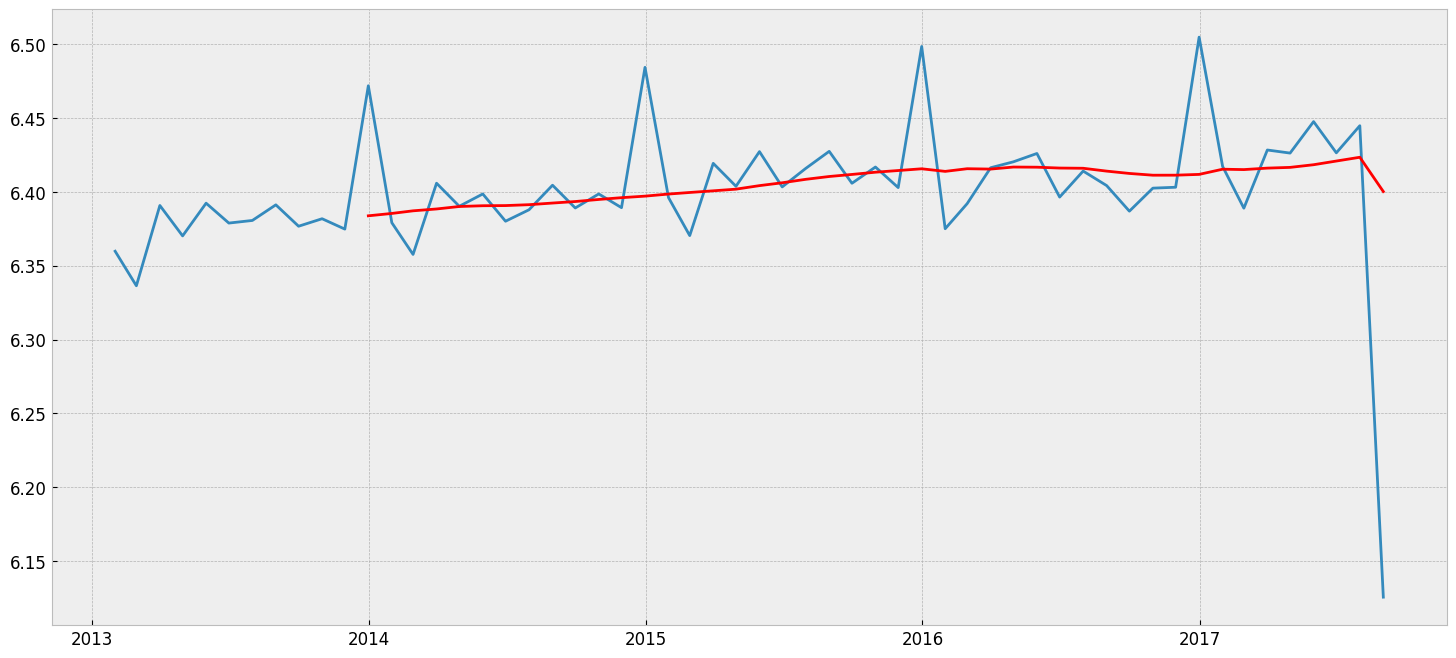

In [298]:
movingAverage = indexedDataset_logscale.rolling(window=12).mean()
movingSTD=indexedDataset_logscale.rolling(window=12).std()
plt.plot(indexedDataset_logscale)
plt.plot(movingAverage, color='red')

In [299]:
datasetLogScaleMinusMovingAverage = indexedDataset_logscale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

date
2013-12-31    0.088000
2014-01-31   -0.006281
2014-02-28   -0.029501
2014-03-31    0.017419
2014-04-30    0.000158
2014-05-31    0.007973
2014-06-30   -0.010581
2014-07-31   -0.003435
2014-08-31    0.012071
2014-09-30   -0.004365
Freq: M, Name: transactions, dtype: float64

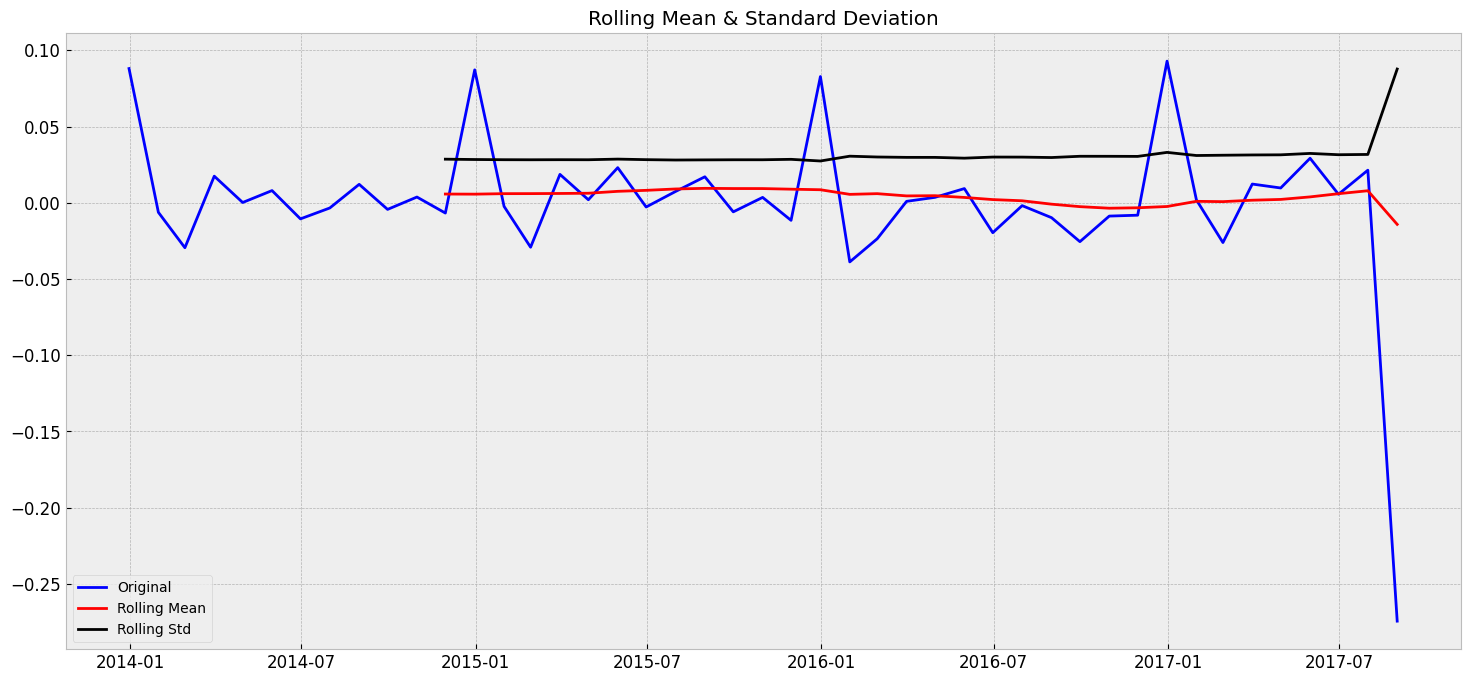

Results of Dickey-Fuller Test:
Test Statistic                 -5.034403
p-value                         0.000019
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
dtype: float64
Test Statistic                 -5.034403
p-value                         0.000019
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
dtype: float64
Test Statistic                 -5.034403
p-value                         0.000019
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


In [300]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)
test_stationarity(datasetLogScaleMinusMovingAverage)

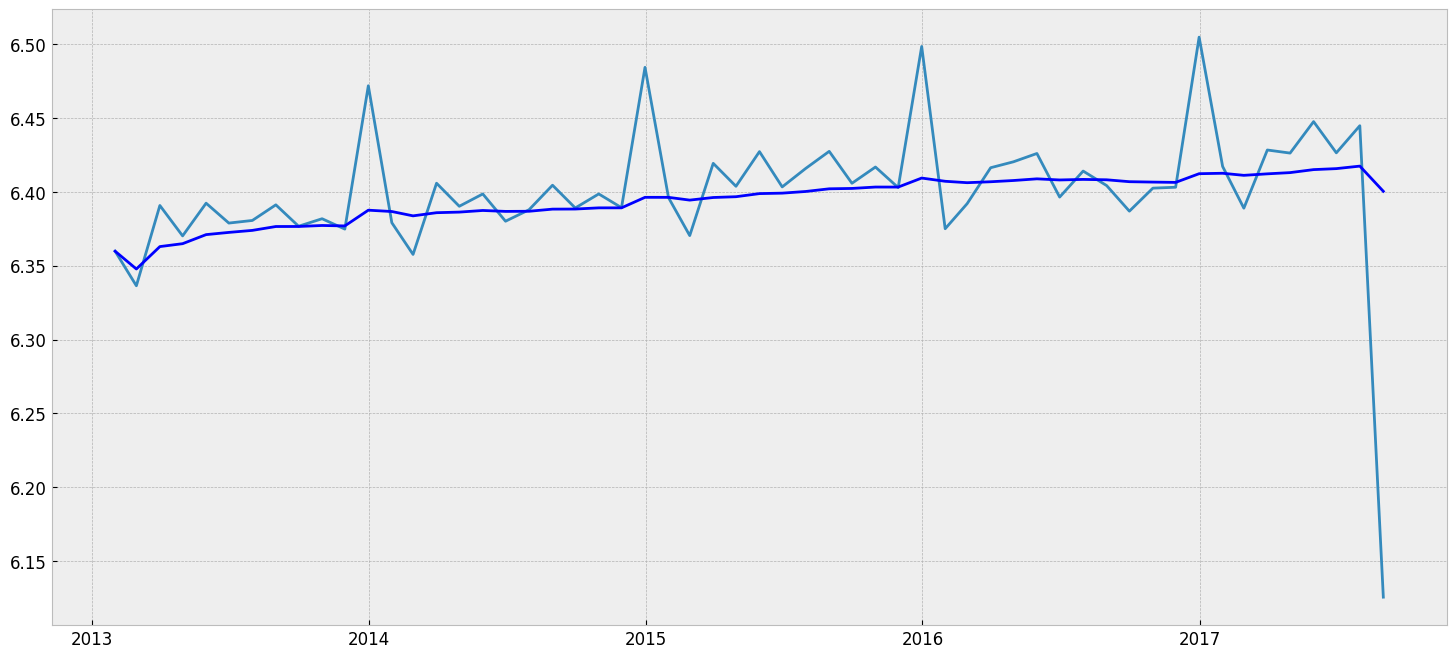

In [301]:
exponentialDecayWeightedAverage = indexedDataset_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponentialDecayWeightedAverage,color ='Blue')

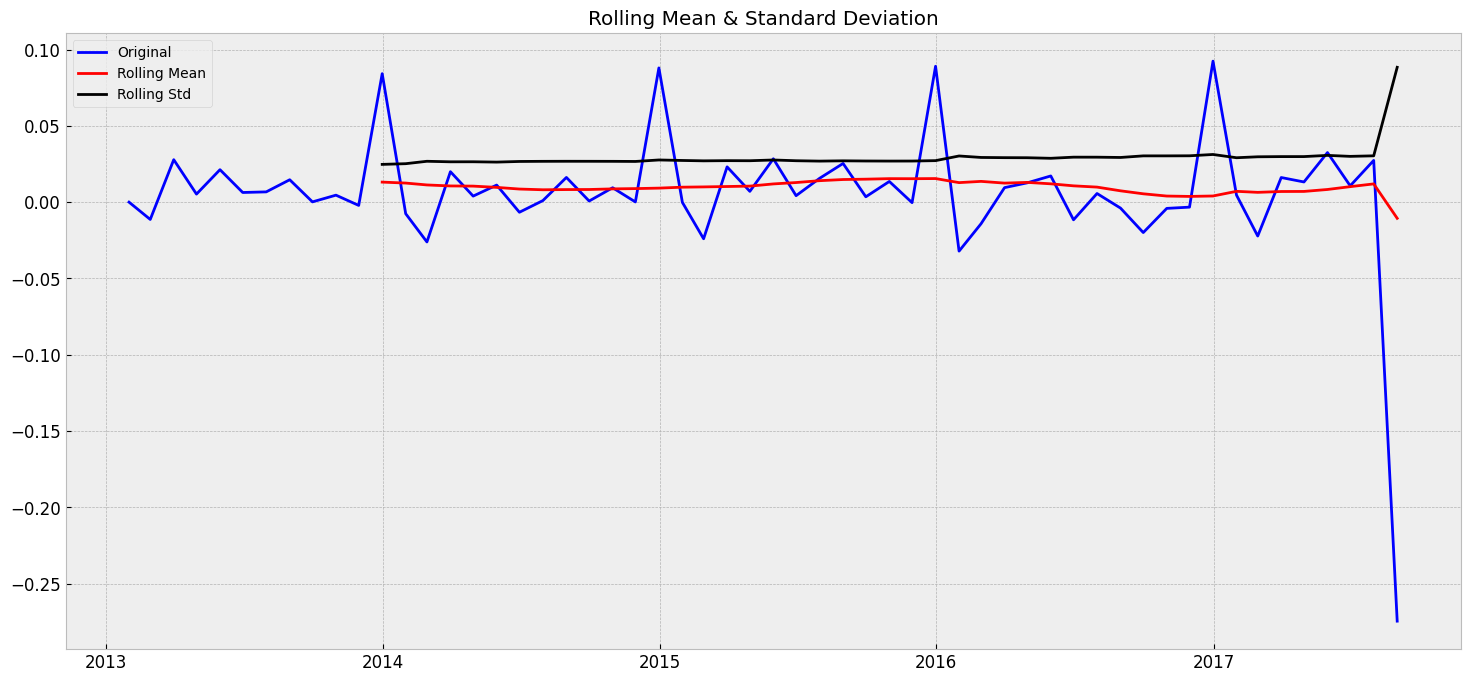

Results of Dickey-Fuller Test:
Test Statistic                 -0.334849
p-value                         0.920422
#Lags Used                     11.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
dtype: float64
Test Statistic                 -0.334849
p-value                         0.920422
#Lags Used                     11.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
dtype: float64
Test Statistic                 -0.334849
p-value                         0.920422
#Lags Used                     11.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


In [302]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logscale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

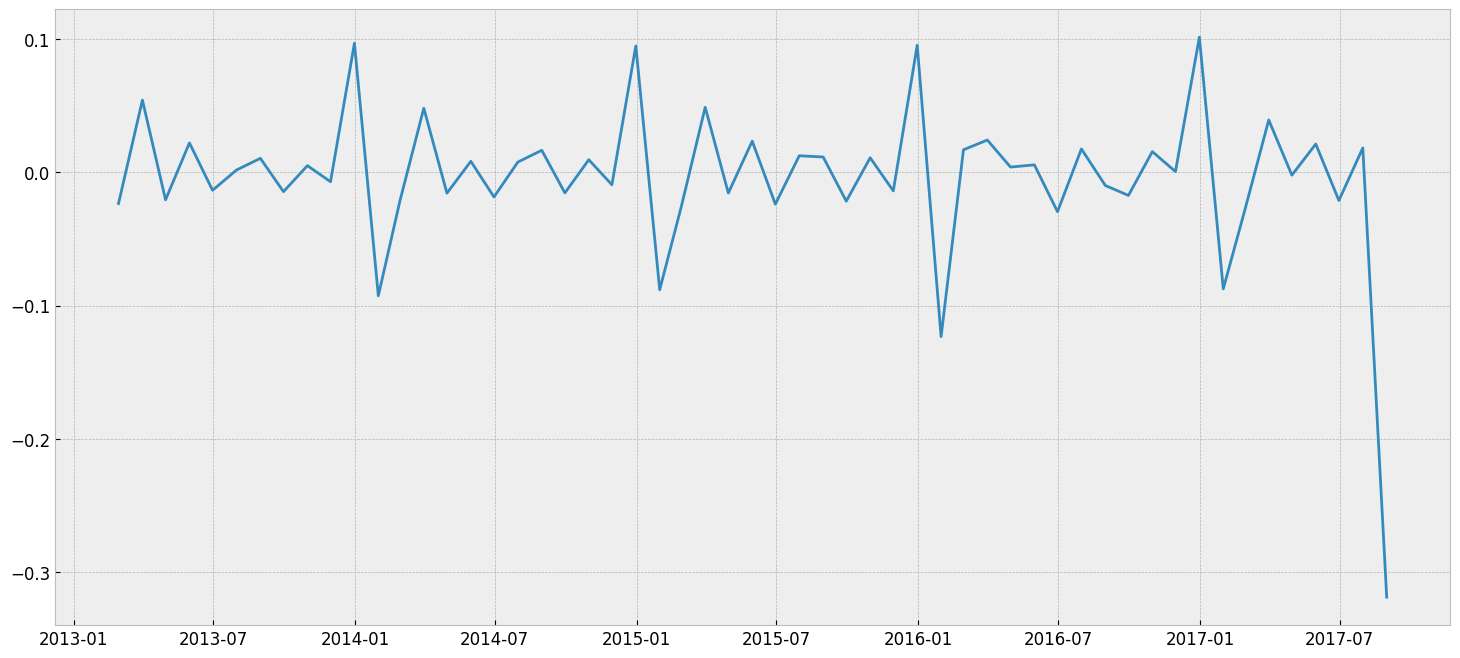

In [303]:
datasetLogDiffShifting = indexedDataset_logscale - indexedDataset_logscale.shift()
plt.plot(datasetLogDiffShifting)

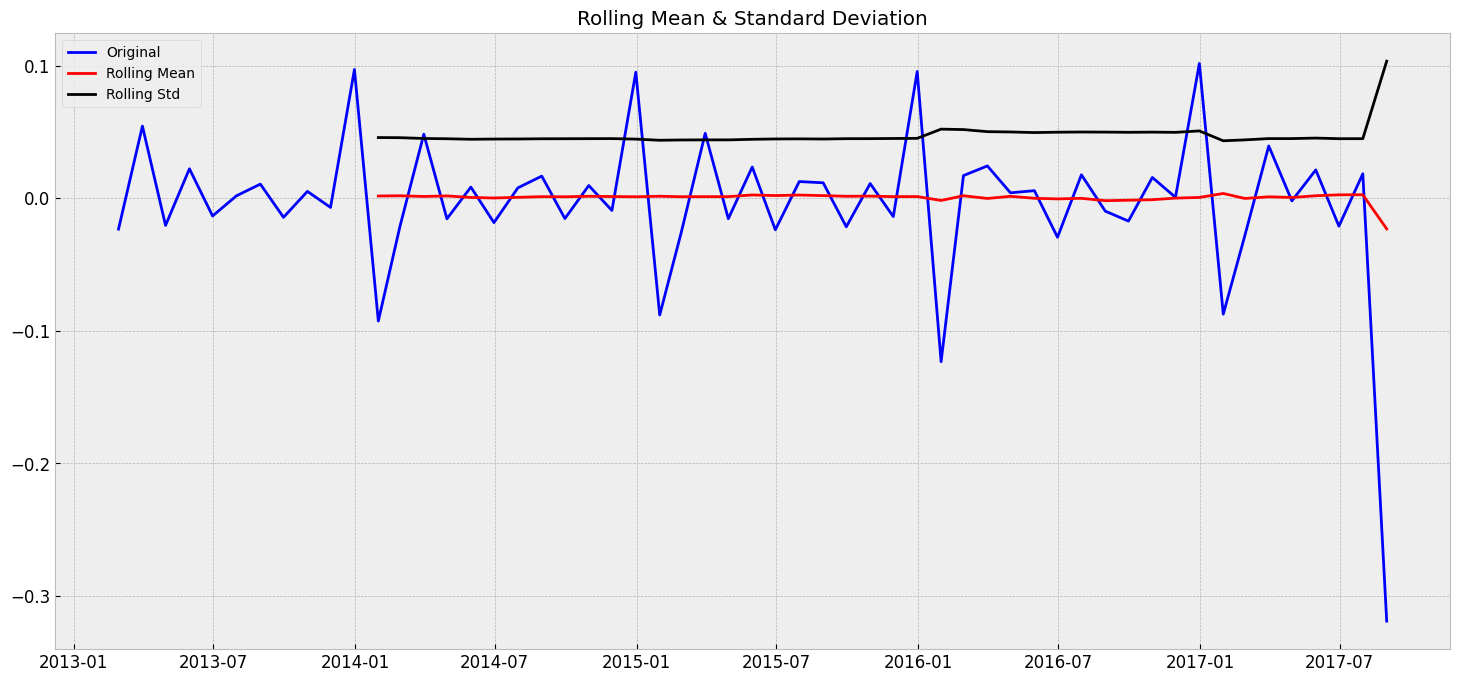

Results of Dickey-Fuller Test:
Test Statistic                 -2.868104
p-value                         0.049185
#Lags Used                     10.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
dtype: float64
Test Statistic                 -2.868104
p-value                         0.049185
#Lags Used                     10.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
dtype: float64
Test Statistic                 -2.868104
p-value                         0.049185
#Lags Used                     10.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


In [304]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

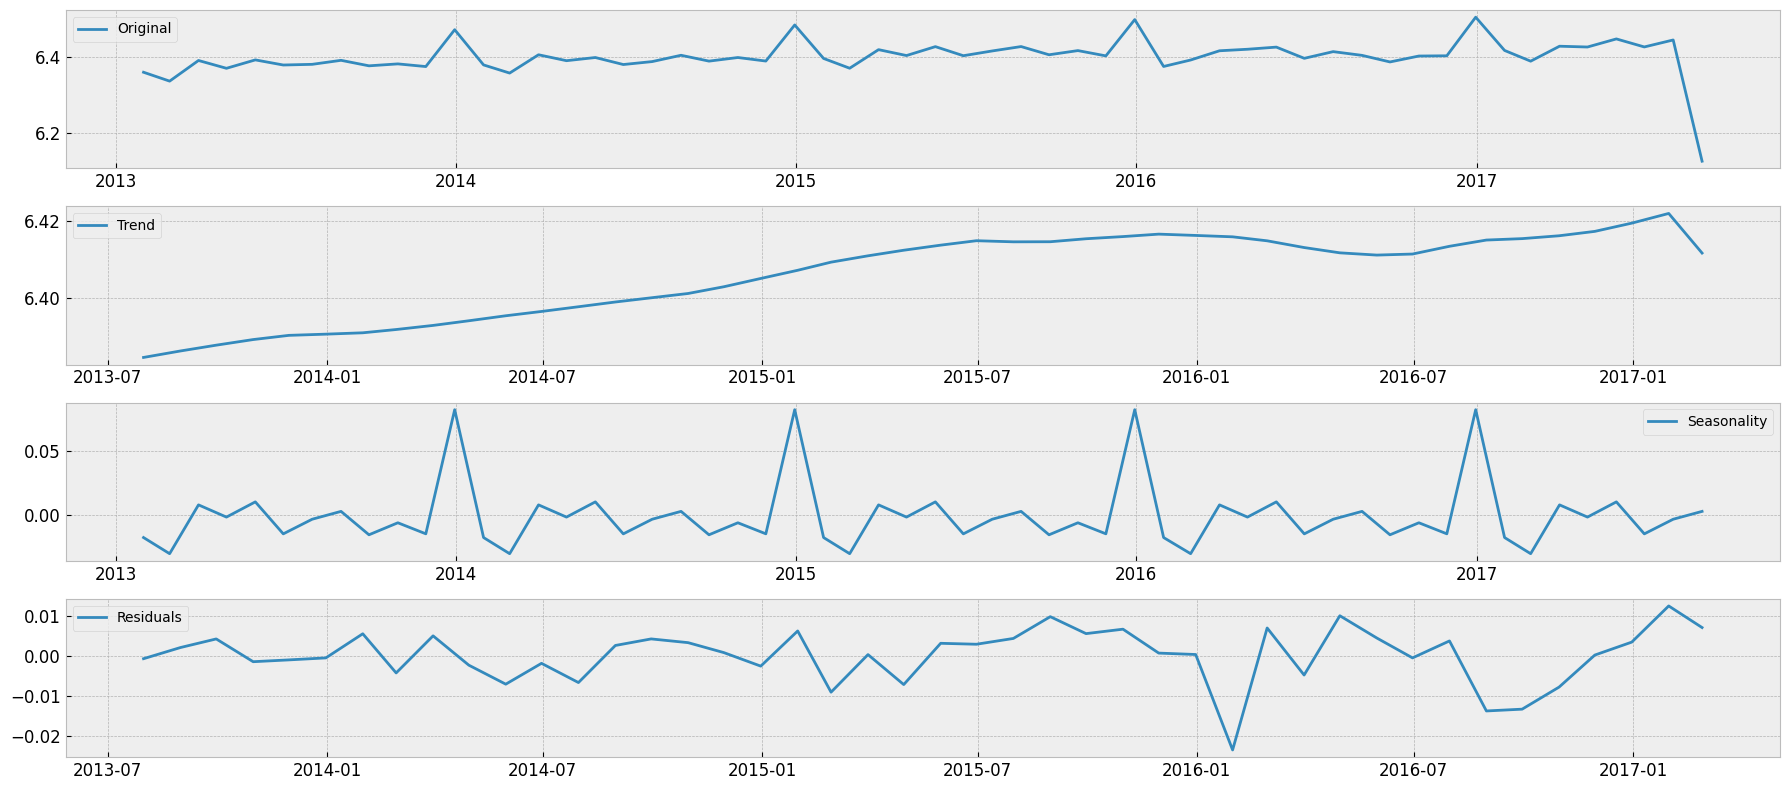

In [305]:
decomposition = seasonal_decompose(indexedDataset_logscale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot (indexedDataset_logscale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot (seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData=residual
decomposedLogData.dropna(inplace=True)

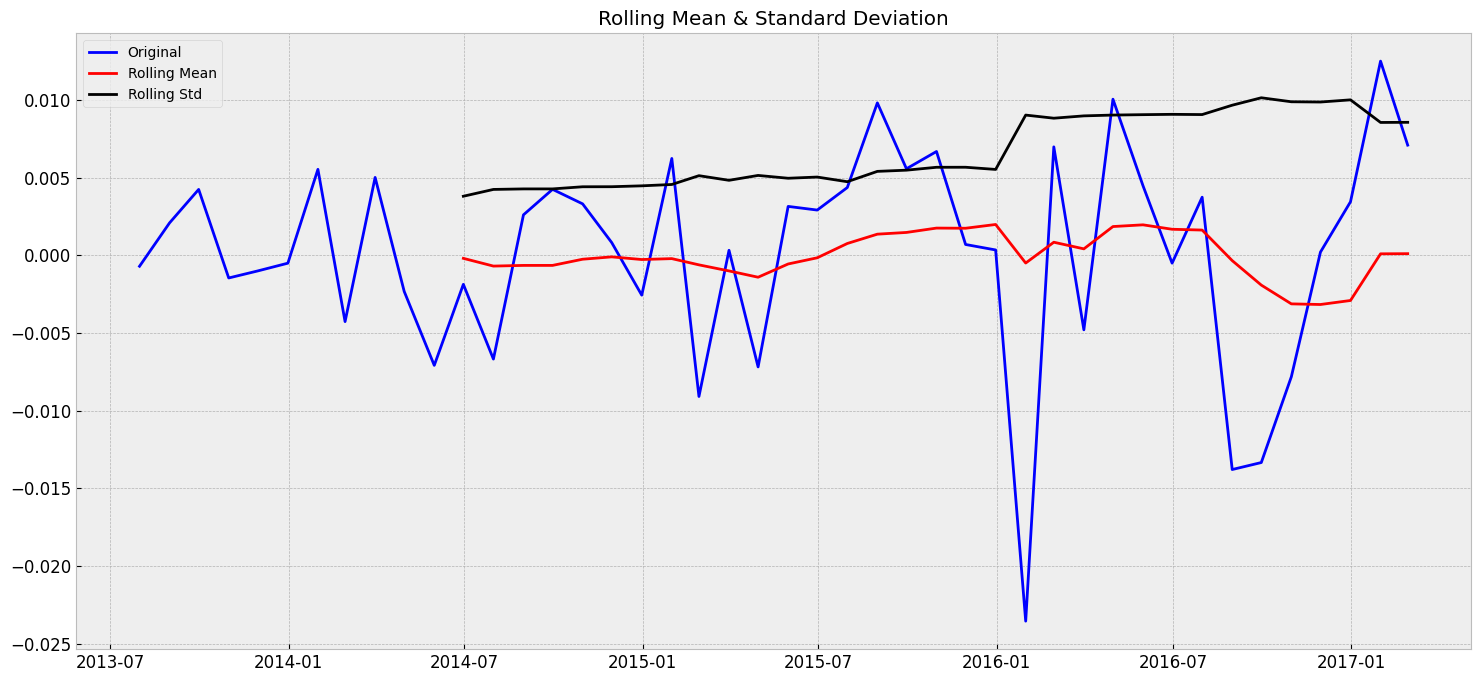

Results of Dickey-Fuller Test:
Test Statistic                 -5.453997
p-value                         0.000003
#Lags Used                      3.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
dtype: float64
Test Statistic                 -5.453997
p-value                         0.000003
#Lags Used                      3.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
dtype: float64
Test Statistic                 -5.453997
p-value                         0.000003
#Lags Used                      3.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64


In [306]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

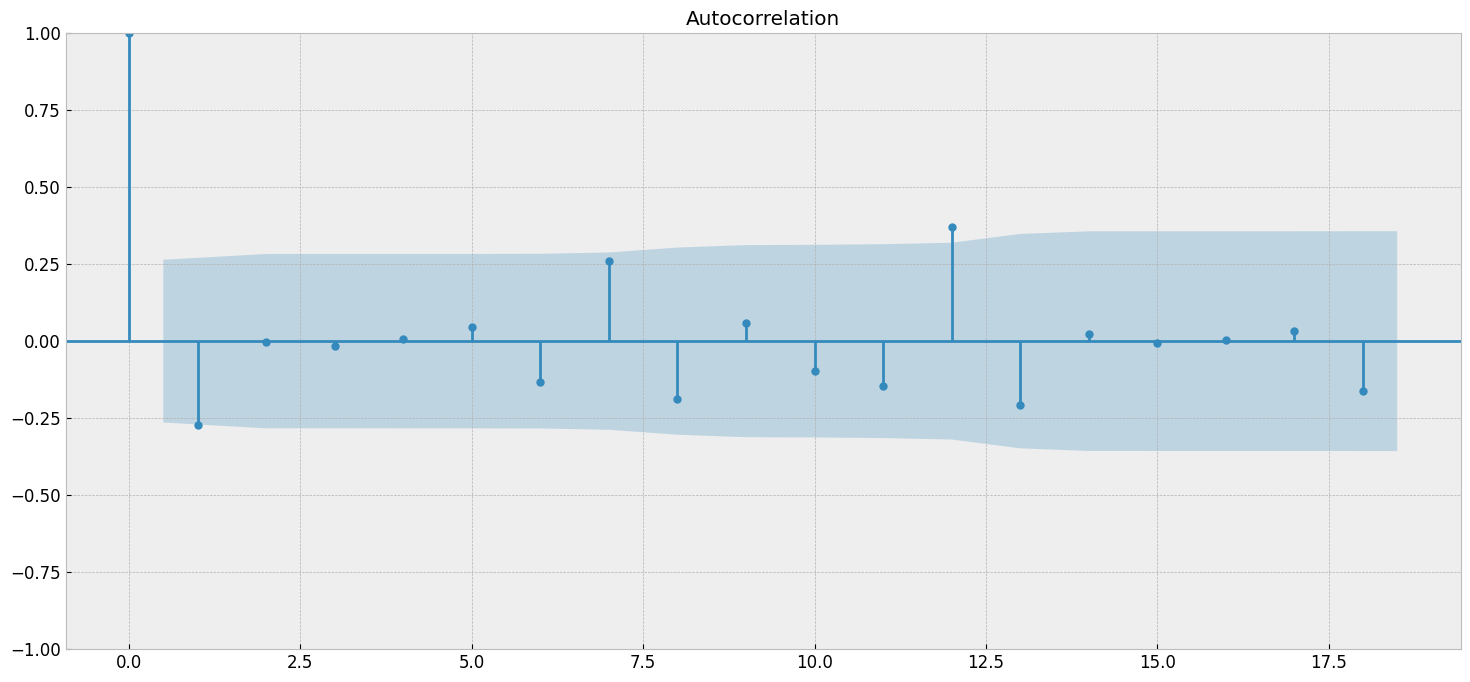

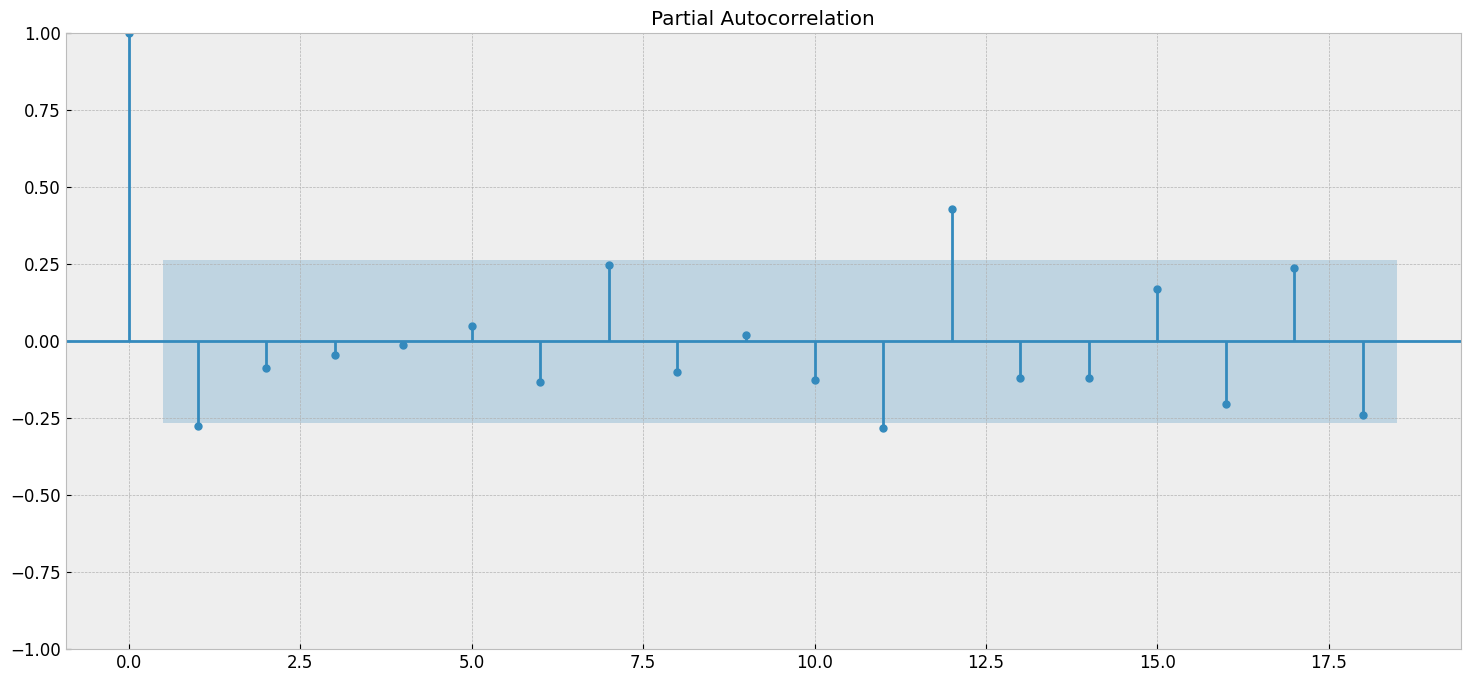

In [307]:
plot_acf(datasetLogDiffShifting)
plot_pacf(datasetLogDiffShifting)
plt.show()

Plotting AR model


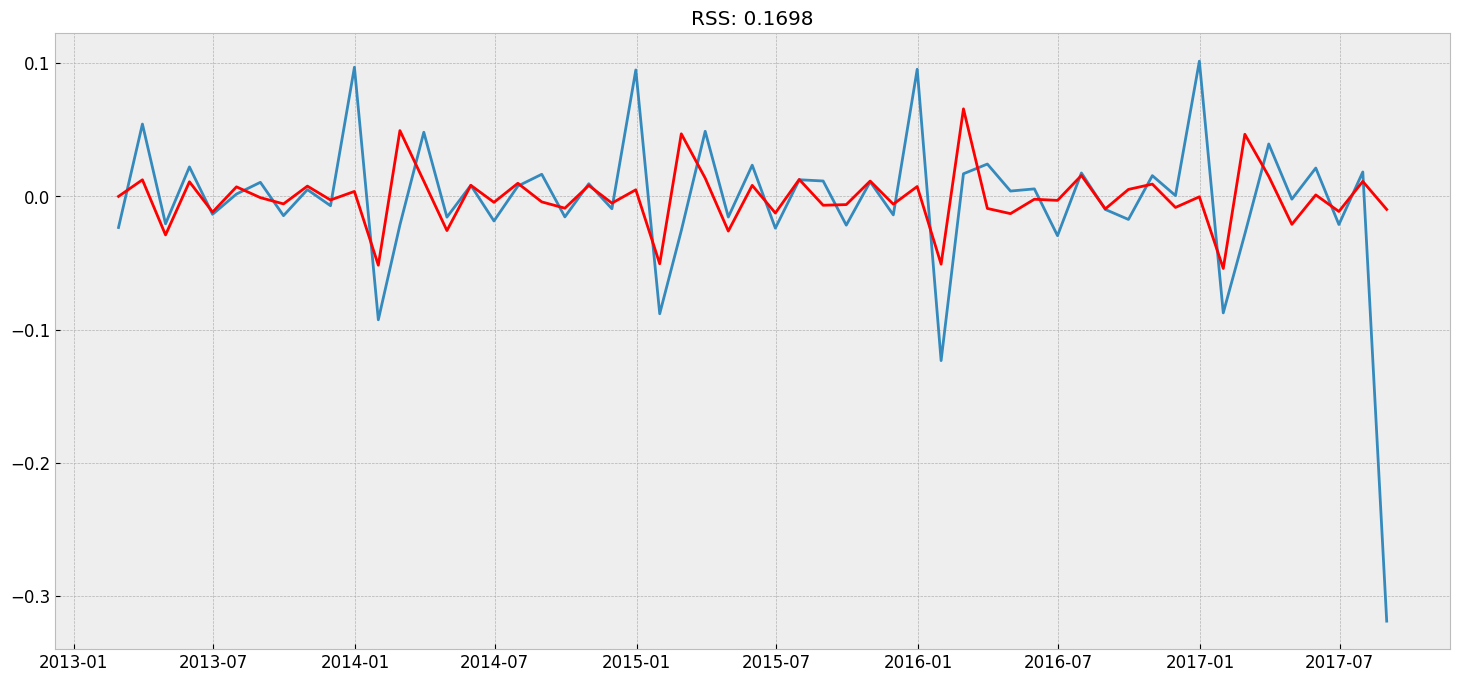

In [308]:
model = SARIMAX(indexedDataset_logscale,order=(1,1,0),simple_differencing=True)
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting)**2))
print('Plotting AR model')

Plotting AR model


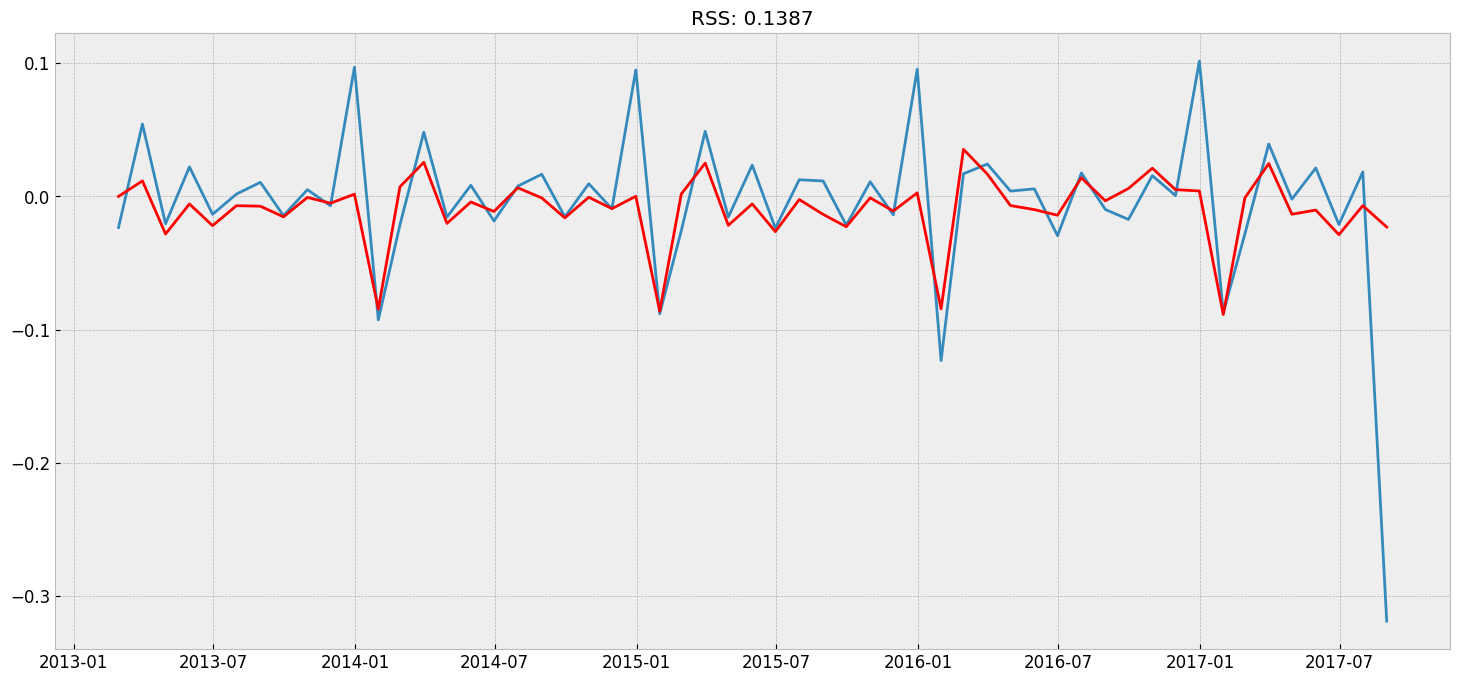

In [309]:
model = SARIMAX(indexedDataset_logscale,order=(0,1,1),simple_differencing=True)
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting)**2))
print('Plotting AR model')

Text(0.5, 1.0, 'RSS: 0.1363')

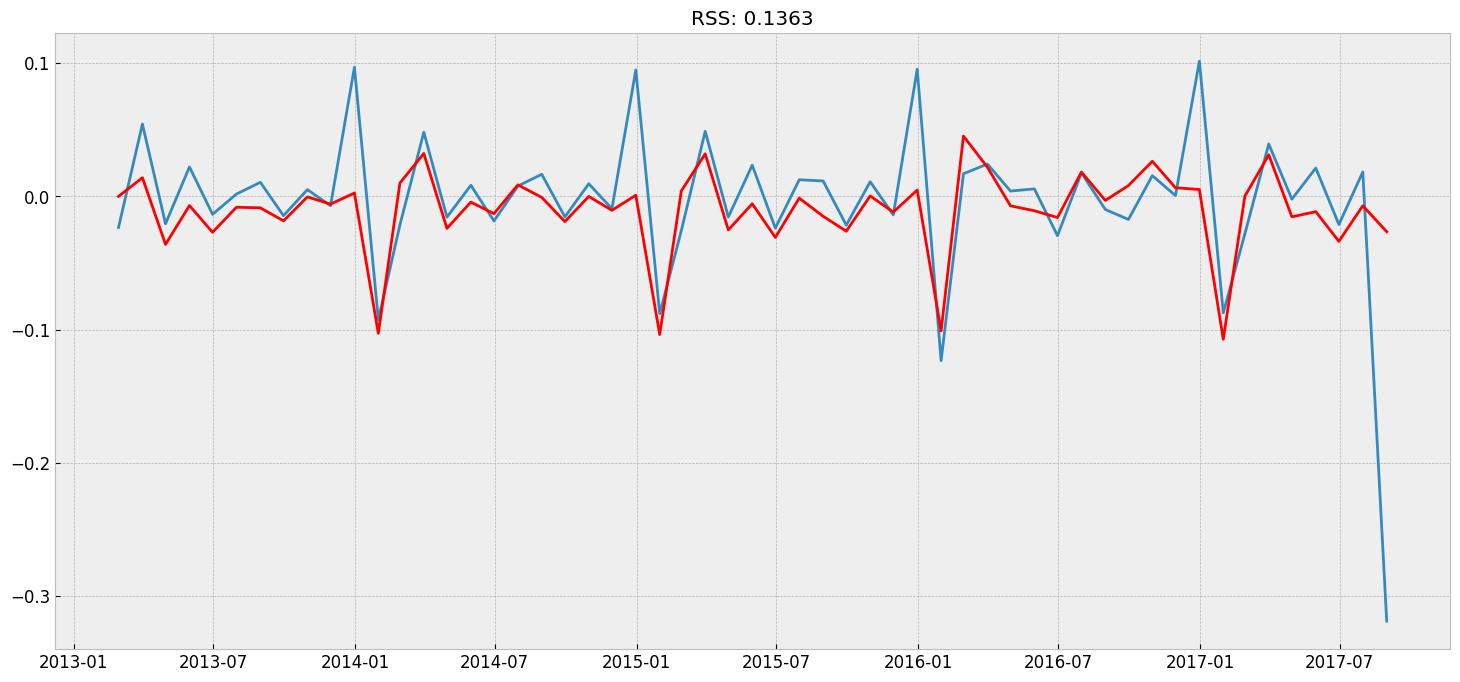

In [310]:
model = SARIMAX(indexedDataset_logscale,order=(1,1,1),simple_differencing=True)
results_SARIMAX = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_SARIMAX.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_SARIMAX.fittedvalues-datasetLogDiffShifting)**2))

In [311]:
predictions_SARIMAX_diff = pd.Series(results_SARIMAX.fittedvalues, copy=True)
print(predictions_SARIMAX_diff.head())
predictions_SARIMAX_diff += 0.011111

date
2013-02-28    0.000000
2013-03-31    0.014033
2013-04-30   -0.036057
2013-05-31   -0.006897
2013-06-30   -0.026965
Freq: M, dtype: float64


In [312]:
predictions_SARIMAX_diff_cumsum = predictions_SARIMAX_diff.cumsum()
print(predictions_SARIMAX_diff_cumsum.head())

date
2013-02-28    0.011111
2013-03-31    0.036255
2013-04-30    0.011309
2013-05-31    0.015523
2013-06-30   -0.000330
Freq: M, dtype: float64


In [313]:
predictions_SARIMAX_log = pd.Series(indexedDataset_logscale.iloc[0], index=indexedDataset_logscale.index)
predictions_SARIMAX_log = predictions_SARIMAX_log.add(predictions_SARIMAX_diff_cumsum,fill_value=0)
predictions_SARIMAX_log.head()

date
2013-01-31    6.359752
2013-02-28    6.370863
2013-03-31    6.396007
2013-04-30    6.371061
2013-05-31    6.375275
Freq: M, dtype: float64

Text(0.5, 1.0, 'RMSE: 0.0640')

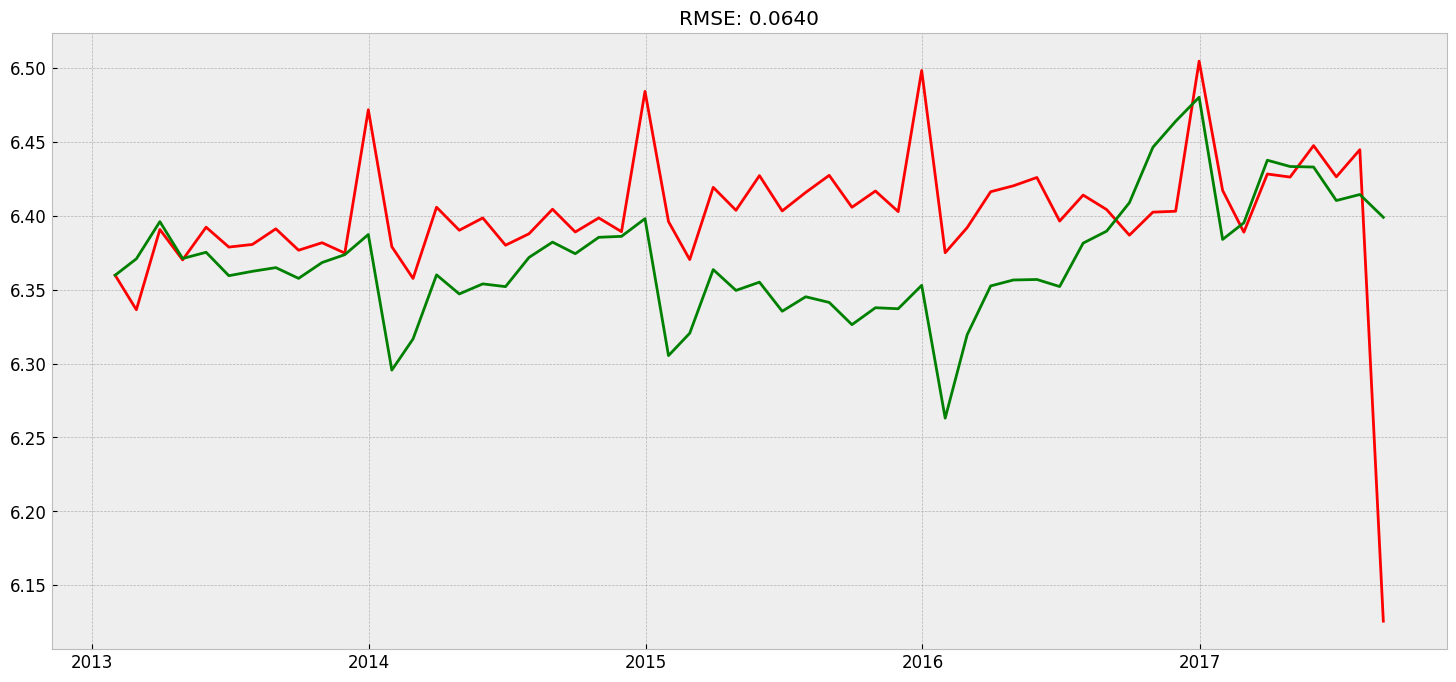

In [314]:
predictions_SARIMAX = predictions_SARIMAX_log
plt.plot(indexedDataset_logscale, color='Red')
plt.plot(predictions_SARIMAX_log, color='Green')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_SARIMAX_log-indexedDataset_logscale)**2)/len(indexedDataset_logscale)))

Text(0.5, 1.0, 'RMSE: 0.0640')

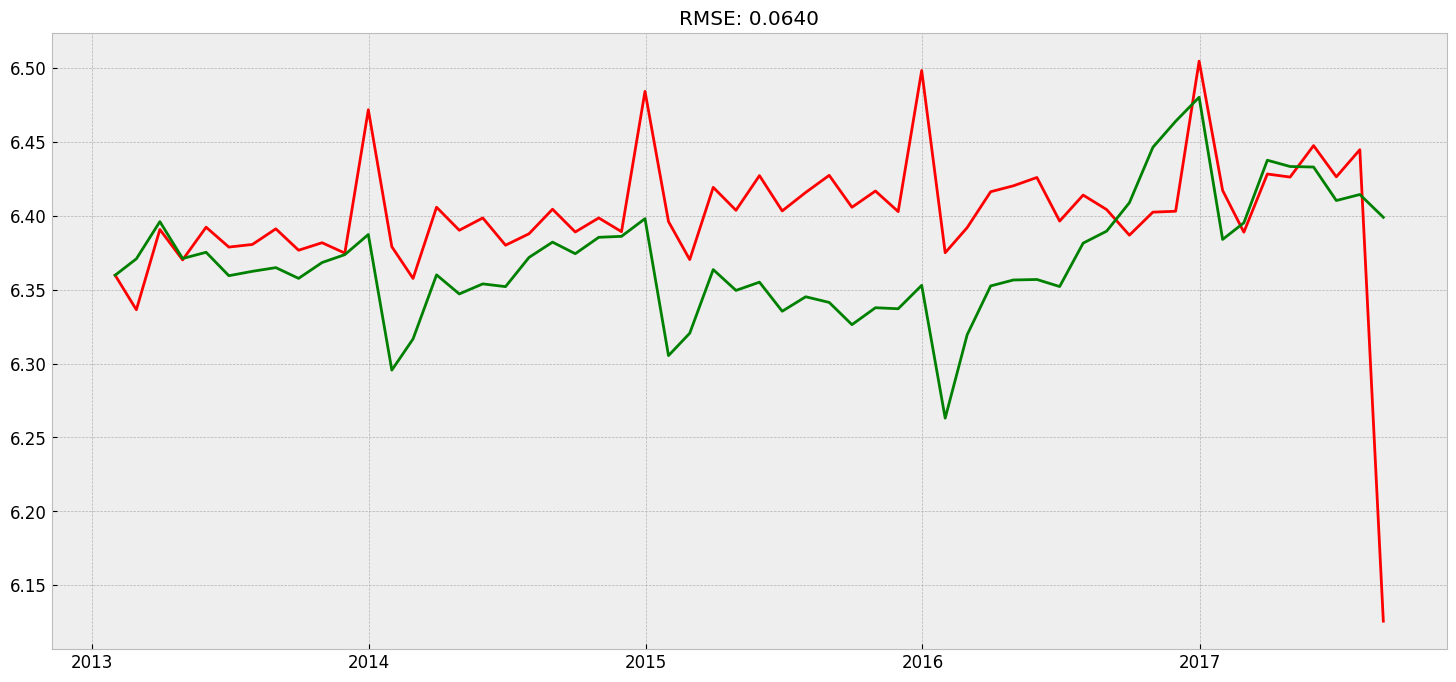

In [247]:
predictions_SARIMAX = predictions_SARIMAX_log
plt.plot(indexedDataset_logscale, color='Red')
plt.plot(predictions_SARIMAX, color='Green')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_SARIMAX-indexedDataset_logscale)**2)/len(indexedDataset_logscale)))

In [245]:
from statsmodels.graphics.tsaplots import plot_predict

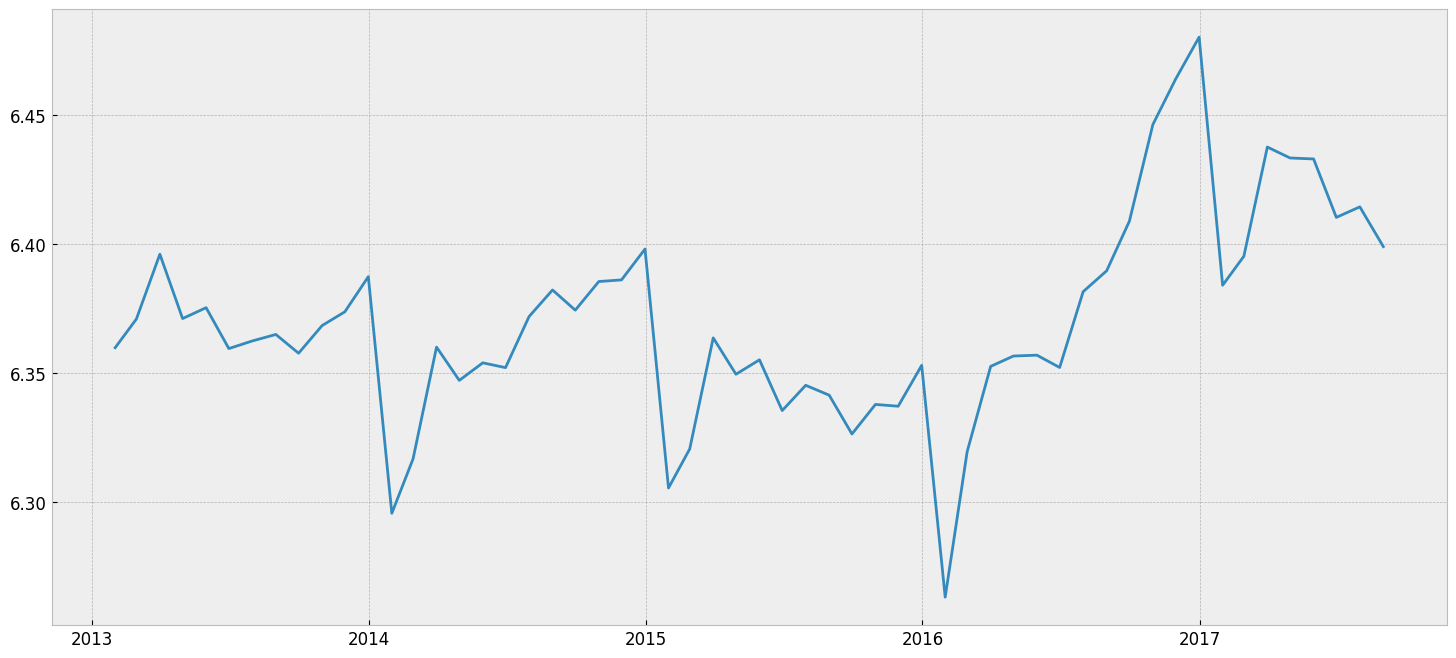

In [248]:
plot_predict(results_SARIMAX)

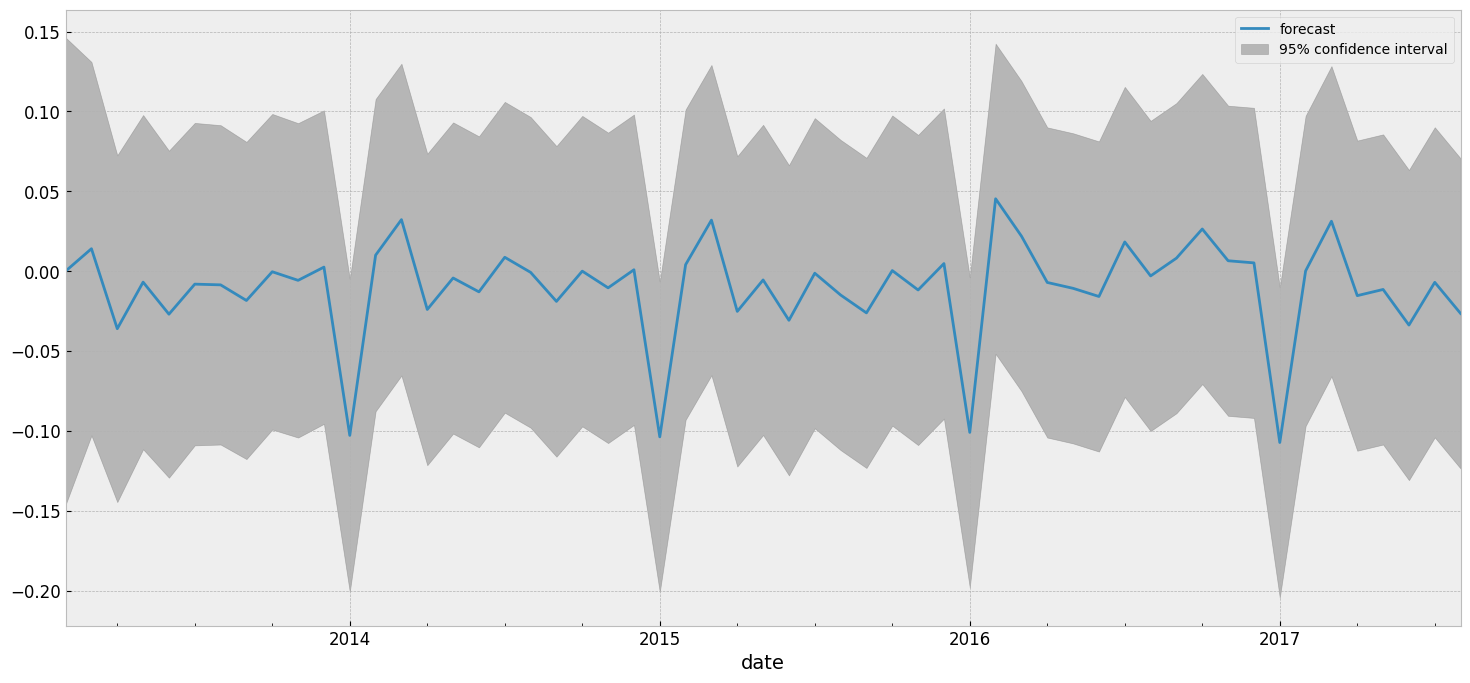

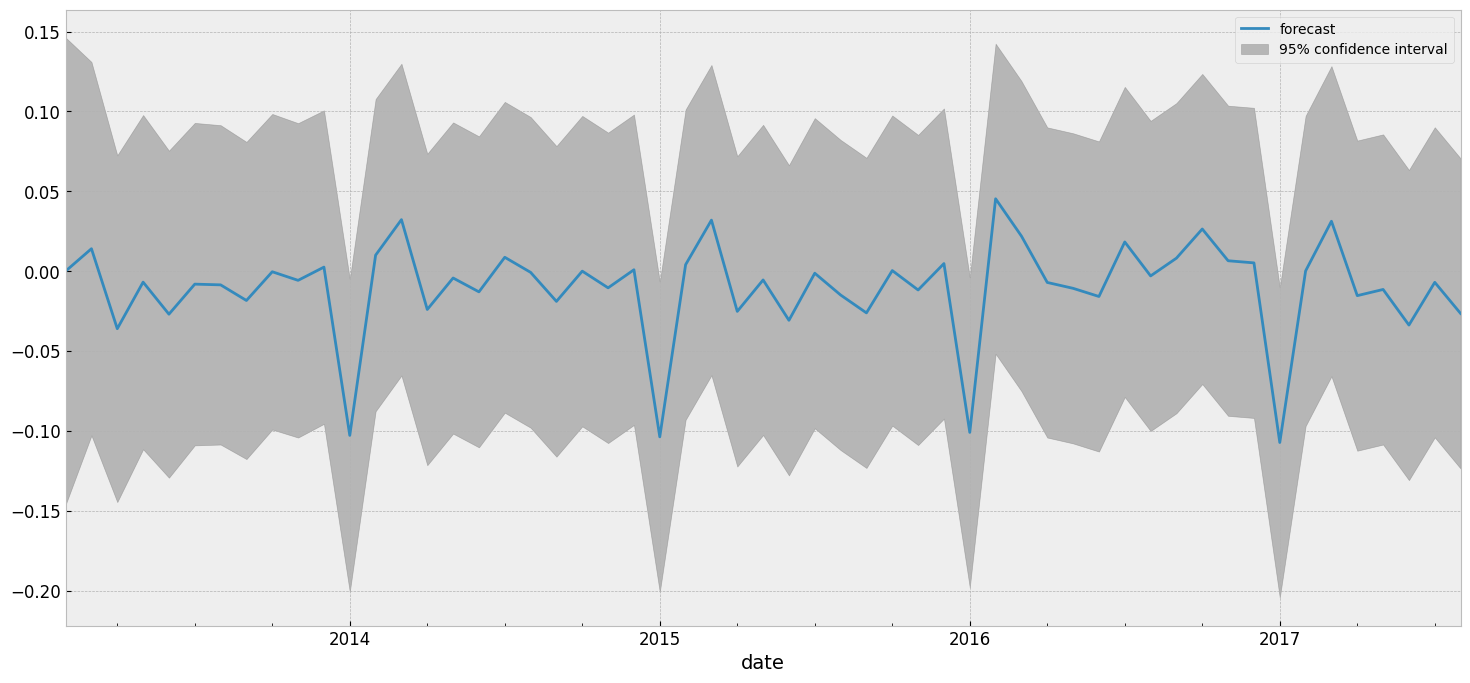

In [255]:
plot_predict(results_SARIMAX)

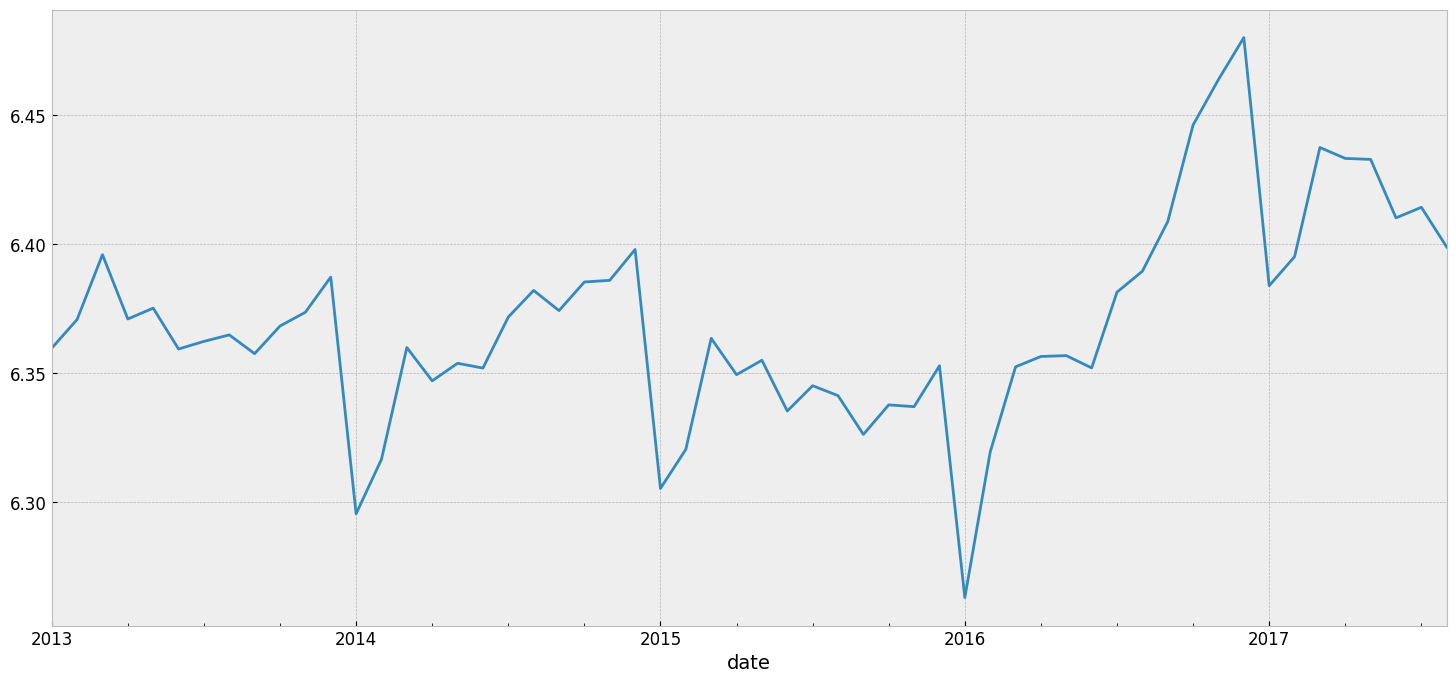

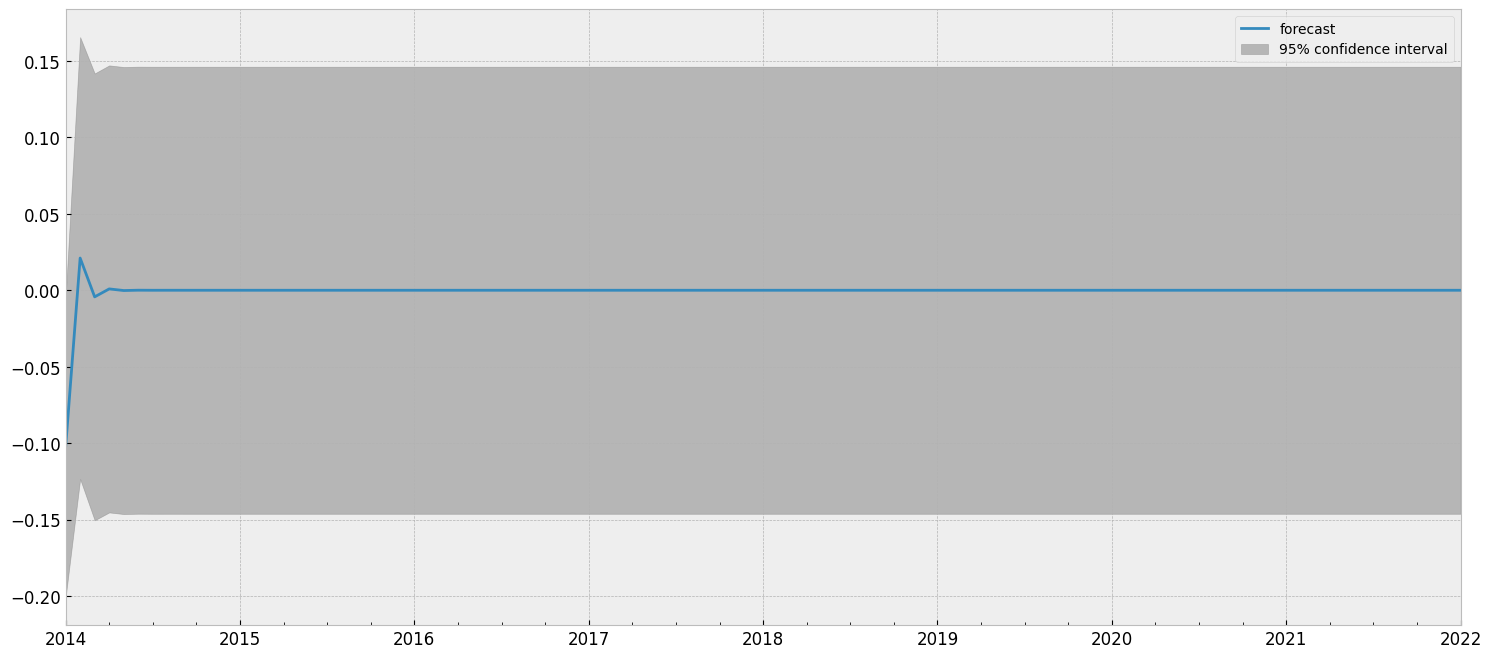

In [315]:
fig, ax = plt.subplots()
ax = predictions_SARIMAX.loc['2013':].plot(ax=ax)
fig = plot_predict(results_SARIMAX,'2014', '2022', dynamic=True, plot_insample=False)

In [266]:
model=sm.tsa.statespace.SARIMAX(indexedDataset_logscale,order=(1, 1, 1))
results_SARIMAX=model.fit()
indexedDataset_logscale=results_SARIMAX.predict(start=90,end=103,dynamic=True)
['indexedDataset_logscale','results_SARIMAX'].plot_predict(figsize=(12,8))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.08056D+00    |proj g|=  3.64326D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     21      1     0     0   3.643D+04  -9.081D+00
  F =  -9.0805602272276200     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


AttributeError: 'list' object has no attribute 'plot_predict'